# Prediction of Fraudlent transactions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data into a DataFrame
df=pd.read_csv('synth_composite.csv')

In [3]:
df.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.390056e+02,1.798555e+05,8.338976e+05,7.930853e+05,1.100708e+06,1.225002e+06,1.290820e-03,2.200351e-06
std,1.416541e+02,6.038687e+05,2.888443e+06,2.853683e+06,3.399178e+06,3.674127e+06,3.590480e-02,1.483357e-03
min,1.000000e+00,-7.000000e+00,-9.500000e+01,-1.090000e+02,7.569468e-06,1.262637e-05,0.000000e+00,0.000000e+00
25%,1.530000e+02,1.338835e+04,1.579492e+00,0.000000e+00,1.000945e+01,1.108928e+01,0.000000e+00,0.000000e+00
50%,2.350000e+02,7.486883e+04,1.420658e+04,0.000000e+00,1.327044e+05,2.146617e+05,0.000000e+00,0.000000e+00
75%,3.310000e+02,2.087138e+05,1.073114e+05,4.948253e+04,9.430392e+05,1.111907e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244538e+07,5.958502e+07,4.958503e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.type.value_counts()

CASH_OUT    2237541
PAYMENT     2151630
CASH_IN     1399101
TRANSFER     532919
DEBIT         41429
Name: type, dtype: int64

In [8]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
df.amount.value_counts()

9.999996e+06    19
9.999990e+06    19
1.000001e+07    18
9.999998e+06    18
1.000000e+07    17
                ..
1.268406e+05     1
1.205129e+06     1
4.080983e+04     1
1.471632e+05     1
4.886421e+06     1
Name: amount, Length: 6362038, dtype: int64

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
# Data is highly imbalanced. There is only 0.0012% fraud transactions, while 99.87% transactions are not fraud.

# Data visualization

<AxesSubplot:xlabel='isFraud', ylabel='count'>

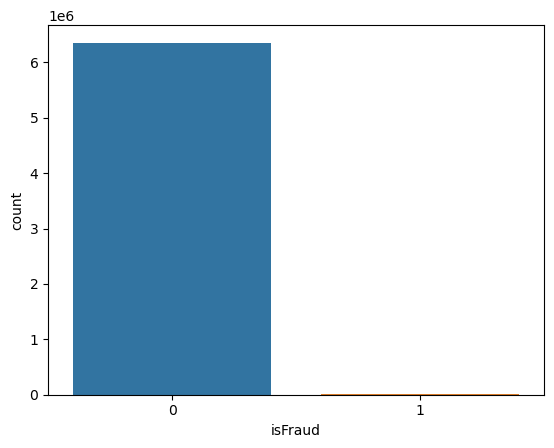

In [13]:
sns.countplot(x=df.isFraud ,data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

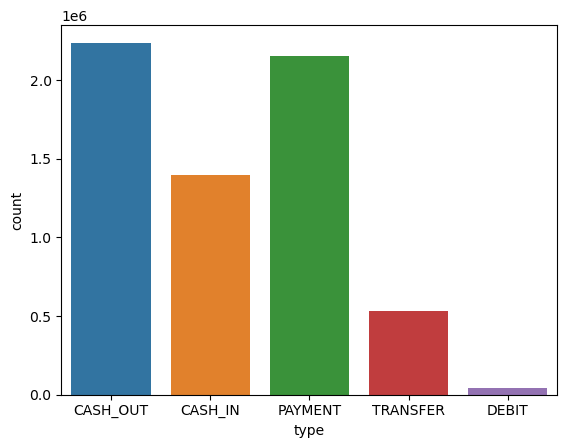

In [14]:
sns.countplot(x=df.type,data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

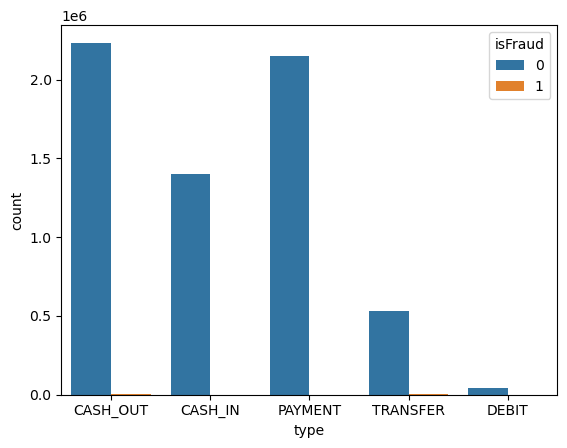

In [15]:
sns.countplot(data=df,x='type',hue='isFraud')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

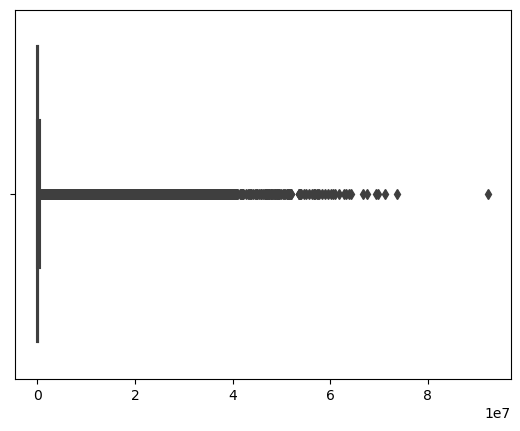

In [16]:
t=df.amount.value_counts().index
sns.boxplot(t)

In [17]:
# There is only 0.0012% fraud transactions, while 99.87% transactions are not fraud.
# Only CASH_OUT and TRANSFER type of transactions have fraus transactions.
# Boxplot shows that there are too many outliers. We will treat the outliers by IsolationForest, later on in the notebook.

# IsolationForest pour la détection d'anomalies

1% contamination-->1000 outliers(normal amount)

In [32]:
from sklearn.ensemble import IsolationForest
# Taux d'anomalie attendu dans les données
contamination=0.01
dfc=df.copy()

In [27]:
%%time
model=IsolationForest(contamination=contamination,n_estimators=100)
model.fit(dfc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Wall time: 8min 55s


IsolationForest(contamination=0.01)

In [29]:
#Prédiction des anomalies
df['inforest'] = pd.Series(model.predict(dfc))#-1 pour les anomalies (outliers) et 1 pour les exemples normaux.
df['inforest'] = df['inforest'].map({1: 0, -1: 1})

print(df['inforest'].value_counts())

0    6298993
1      63627
Name: inforest, dtype: int64


# Détection de doublons  avec RandomForest 

In [33]:
df[df.nameOrig.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,inforest
91320,182,CASH_OUT,341663.023945,160_1344032_0,4.984074e+05,1.567444e+05,160_110006_0,1.143683e+06,1.485415e+06,0,0,0
126261,14,CASH_OUT,164298.380036,160_237567_0,1.308554e+00,0.000000e+00,160_51472_0,1.850767e+06,1.861776e+06,0,0,0
126428,225,CASH_IN,29101.172269,160_2806380_0,1.847564e+06,1.818463e+06,160_184463_0,3.238981e+05,2.948341e+05,0,0,0
147279,304,PAYMENT,6285.979443,160_3335748_0,1.024174e+00,0.000000e+00,160_1422771_0,1.340921e+01,2.497994e+00,0,0,0
147294,234,PAYMENT,6467.409576,160_3343801_0,1.072058e+00,0.000000e+00,160_1426194_0,7.941932e+00,4.095192e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6353377,17,CASH_OUT,264422.244701,160_372264_0,3.007848e+05,3.636259e+04,160_77932_0,2.503096e+05,5.149228e+05,0,0,0
6353826,279,CASH_IN,28076.689375,160_1051649_0,1.043394e+04,0.000000e+00,160_670958_0,3.023171e+06,2.995209e+06,0,0,0
6354128,307,CASH_IN,176144.359022,160_2200359_0,3.462348e+04,0.000000e+00,160_548304_0,2.459787e+05,6.965321e+04,0,0,0
6354278,202,PAYMENT,11364.863202,160_118751_0,5.041879e+05,4.928230e+05,160_1032891_0,1.279989e+01,1.792692e+00,0,0,0


In [34]:
df[df.nameDest.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,inforest
1692,10,CASH_OUT,7.507426e+04,160_78985_0,3.848838e-01,0.000000,160_11800_0,1.219229e+06,1.294298e+06,0,0,0
1746,142,CASH_OUT,9.147815e+04,160_1494086_0,1.513798e-02,0.000000,160_171718_0,2.037957e+05,2.952038e+05,0,0,0
1779,42,CASH_OUT,8.187598e+04,160_893371_0,2.026938e+00,0.000000,160_262792_0,1.030396e+06,1.112415e+06,0,0,0
1795,256,CASH_IN,1.193981e+05,160_3423644_0,9.962513e+05,876853.173764,160_1170039_0,1.665517e+06,1.546095e+06,0,0,0
1899,249,TRANSFER,1.699147e+06,160_3203453_0,1.630619e+00,0.000000,160_343822_0,2.025967e+06,3.724909e+06,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362378,686,CASH_OUT,1.600987e+05,161_7554_0,1.601087e+05,10.000000,161_3002_0,3.023095e+05,4.578601e+05,1,0,0
6362550,613,CASH_OUT,4.677204e+04,161_7188_0,4.673604e+04,-36.000000,161_4168_0,4.847519e+03,5.044862e+04,1,0,0
6362567,88,CASH_OUT,4.022416e+06,161_1063_0,4.022399e+06,-17.000000,161_879_0,4.543801e+06,8.570018e+06,1,0,1
6362588,443,CASH_OUT,3.487555e+05,161_1991_0,3.486685e+05,-87.000000,161_1979_0,8.178707e+02,3.491913e+05,1,0,0


In [35]:
df[df.type.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,inforest
1,394,CASH_OUT,2.370932e+05,160_5585569_0,3.827075e+05,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0,0
4,235,PAYMENT,7.866992e+03,160_5544127_0,7.463233e+04,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0,0
5,493,CASH_OUT,2.814038e+05,160_6037426_0,4.223592e+04,0.000000,160_2092767_0,5.880235e+05,8.693219e+05,0,0,0
6,18,PAYMENT,4.355986e+03,160_400626_0,5.616003e+04,51804.048066,160_175474_0,8.496485e+00,1.078249e+01,0,0,0
7,550,CASH_IN,1.020792e+05,160_6146482_0,1.578172e+04,0.000000,160_354507_0,4.064748e+06,3.962757e+06,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,483,CASH_OUT,2.298273e+04,161_5384_0,2.298173e+04,-1.000000,161_5356_0,3.279893e+06,3.304007e+06,1,0,0
6362616,214,CASH_OUT,1.368390e+06,161_2420_0,1.368454e+06,63.000000,161_2408_0,2.589394e+05,1.624944e+06,1,0,0
6362617,679,CASH_OUT,3.150440e+06,161_7476_0,3.150454e+06,14.000000,161_7437_0,6.372507e+03,3.157667e+06,1,0,1
6362618,482,CASH_OUT,7.565533e+04,161_5366_0,7.564733e+04,-8.000000,161_5338_0,8.529471e+05,9.285452e+05,1,0,0


In [37]:
#encoding data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
dfc['type']=le.fit_transform(df.type)

dfc['nameDest']=le.fit_transform(df.nameDest)

dfc['nameOrig']=le.fit_transform(df.nameOrig)

In [38]:
dfc.type.unique()

array([1, 0, 3, 4, 2])

In [39]:
dfc.nameDest.unique()

array([2610310,  652158,  779800, ..., 2726836, 2724504, 2726900])

In [40]:
dfc.nameOrig.unique()

array([1885159, 5095073, 3579301, ..., 6352316, 6349972, 6352381])

In [47]:
from sklearn.ensemble import RandomForestClassifier

dfc['anomaly']=0
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(dfc[['nameOrig','nameDest','type']], dfc['anomaly'])

RandomForestClassifier(random_state=42)

In [48]:
df['is_duplicate'] = model_rf.predict(dfc[['nameOrig','nameDest','type']])
print(df['is_duplicate'].value_counts())

0    6362620
Name: is_duplicate, dtype: int64
